# Data preparation

## Import of required libraries
Those libraries are used in the notebook to perform the data preparation. Maybee you need to install them first with `pip install <library>`.  

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline


# Load Huggingface transformers
from transformers import TFBertModel,  BertConfig, BertTokenizerFast, TFAutoModel

# Then what you need from tensorflow.keras
from tensorflow.keras.layers import Input, Dropout, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical


pd.set_option('display.max_colwidth', 100)

First I want to import the file

In [107]:
all_data_df = pd.read_csv('../01_Kontext/10_datasource/interaction_with_date_and_time.csv', sep=',', encoding='utf-8')
all_data_df.head()

,interaction_id,tweet_id,senderuser_id,receiveruser_id,tweet_text,cyberbullying_type,interaction_timestamp
0,1304,1510,876,2009,@g56yu What is that?,not_cyberbullying,41:34.9
1,1998,31503,918,2436,@stockputout yes,other_cyberbullying,37:48.7
2,2533,27942,1409,3624,5/13/15,other_cyberbullying,50:46.1
3,2598,52129,1341,3290,@Blackamazon EXACTLY THIS.,none,04:51.4
4,3511,54626,831,2812,@Oddtankout http://t.co/K5mMJE8UME,none,11:11.2


In [108]:
all_data_df.shape

(64345, 7)

In [109]:
all_data_df.columns

Index(['interaction_id', 'tweet_id', 'senderuser_id', 'receiveruser_id',
       'tweet_text', 'cyberbullying_type', 'interaction_timestamp'],
      dtype='object')

In [110]:
all_data_df.head()

,interaction_id,tweet_id,senderuser_id,receiveruser_id,tweet_text,cyberbullying_type,interaction_timestamp
0,1304,1510,876,2009,@g56yu What is that?,not_cyberbullying,41:34.9
1,1998,31503,918,2436,@stockputout yes,other_cyberbullying,37:48.7
2,2533,27942,1409,3624,5/13/15,other_cyberbullying,50:46.1
3,2598,52129,1341,3290,@Blackamazon EXACTLY THIS.,none,04:51.4
4,3511,54626,831,2812,@Oddtankout http://t.co/K5mMJE8UME,none,11:11.2


As next we should check if there are some missing values or not.

In [111]:
count = all_data_df.isna().sum()
precentange = all_data_df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
cyberbullying_type,3,0.0
tweet_text,1,0.0
interaction_id,0,0.0
tweet_id,0,0.0
senderuser_id,0,0.0
receiveruser_id,0,0.0
interaction_timestamp,0,0.0


In [112]:
# Find rows where 'tweet_text' is empty
missing_tweets = all_data_df[all_data_df['tweet_text'].isnull()]

# Display the rows with missing 'tweet_text'
print(missing_tweets)

    interaction_id  tweet_id  senderuser_id  receiveruser_id tweet_text  \
13            5934     50686            501             1570        NaN   

   cyberbullying_type interaction_timestamp  
13                NaN               36:07.0  


In [113]:
# Drop rows where 'tweet_text' is missing
all_data_df = all_data_df.dropna(subset=['tweet_text'])

# Display the DataFrame after dropping the rows
print(all_data_df.head())


   interaction_id  tweet_id  senderuser_id  receiveruser_id  \
0            1304      1510            876             2009   
1            1998     31503            918             2436   
2            2533     27942           1409             3624   
3            2598     52129           1341             3290   
4            3511     54626            831             2812   

                           tweet_text   cyberbullying_type  \
0                @g56yu What is that?    not_cyberbullying   
1                    @stockputout yes  other_cyberbullying   
2                             5/13/15  other_cyberbullying   
3          @Blackamazon EXACTLY THIS.                 none   
4  @Oddtankout http://t.co/K5mMJE8UME                 none   

  interaction_timestamp  
0               41:34.9  
1               37:48.7  
2               50:46.1  
3               04:51.4  
4               11:11.2  


In [114]:
all_data_df.groupby(['cyberbullying_type'])['cyberbullying_type'].describe()[['count']]

,count
cyberbullying_type,
age,7960
ethnicity,7942
gender,7946
none,11458
not_cyberbullying,7923
other_cyberbullying,7797
racism,1965
religion,7982
sexism,3369


In [116]:
#calculate length of the comment
all_data_df['length'] = all_data_df['tweet_text'].apply(len)
all_data_df.head()

,interaction_id,tweet_id,senderuser_id,receiveruser_id,tweet_text,cyberbullying_type,interaction_timestamp,length
0,1304,1510,876,2009,@g56yu What is that?,not_cyberbullying,41:34.9,20
1,1998,31503,918,2436,@stockputout yes,other_cyberbullying,37:48.7,16
2,2533,27942,1409,3624,5/13/15,other_cyberbullying,50:46.1,7
3,2598,52129,1341,3290,@Blackamazon EXACTLY THIS.,none,04:51.4,26
4,3511,54626,831,2812,@Oddtankout http://t.co/K5mMJE8UME,none,11:11.2,34


In [117]:
temp = all_data_df.groupby('cyberbullying_type').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,cyberbullying_type,tweet_text
3,none,11458
7,religion,7982
0,age,7960
2,gender,7946
1,ethnicity,7942
4,not_cyberbullying,7923
5,other_cyberbullying,7797
8,sexism,3369
6,racism,1965


/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/salomekoller/anaconda3/envs/pga/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='cyberbullying_type', ylabel='count'>

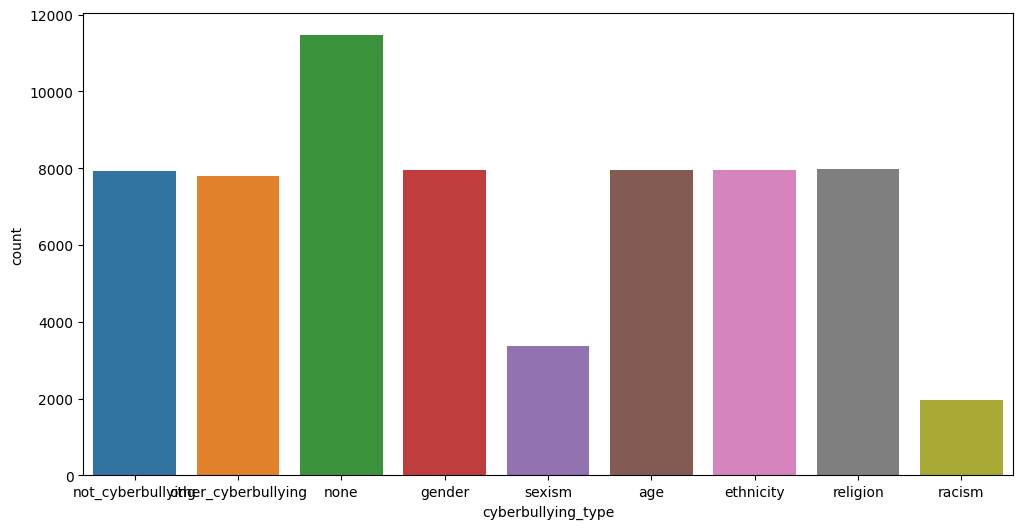

In [118]:
from plotly import graph_objs as go
plt.figure(figsize=(12,6))
sns.countplot(x='cyberbullying_type',data=all_data_df)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'ethnicity'}>,
        <Axes: title={'center': 'gender'}>],
       [<Axes: title={'center': 'none'}>,
        <Axes: title={'center': 'not_cyberbullying'}>,
        <Axes: title={'center': 'other_cyberbullying'}>],
       [<Axes: title={'center': 'racism'}>,
        <Axes: title={'center': 'religion'}>,
        <Axes: title={'center': 'sexism'}>]], dtype=object)

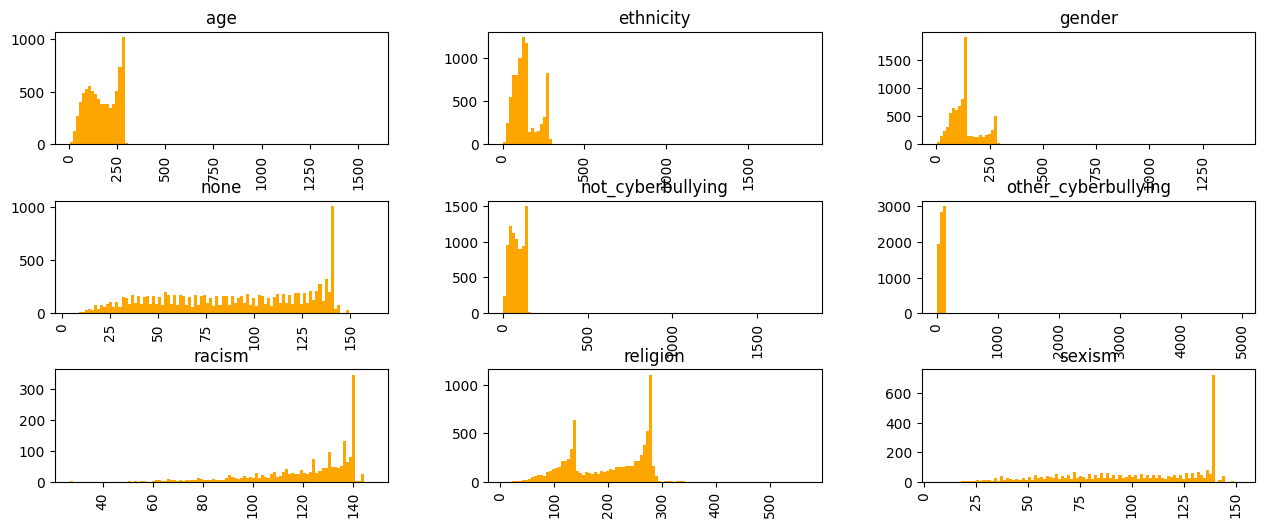

In [119]:
all_data_df.hist(column='length',by='cyberbullying_type',figsize=(15,6), bins=100,color='orange')

In [120]:
exclude = set(",.:;'\"-?!/´`%#")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

In [121]:
all_data_df['cleaned'] = all_data_df['tweet_text'].apply(lambda x: removePunctuation(x))
all_data_df.head()

,interaction_id,tweet_id,senderuser_id,receiveruser_id,tweet_text,cyberbullying_type,interaction_timestamp,length,cleaned
0,1304,1510,876,2009,@g56yu What is that?,not_cyberbullying,41:34.9,20,@g56yu What is that
1,1998,31503,918,2436,@stockputout yes,other_cyberbullying,37:48.7,16,@stockputout yes
2,2533,27942,1409,3624,5/13/15,other_cyberbullying,50:46.1,7,5 13 15
3,2598,52129,1341,3290,@Blackamazon EXACTLY THIS.,none,04:51.4,26,@Blackamazon EXACTLY THIS
4,3511,54626,831,2812,@Oddtankout http://t.co/K5mMJE8UME,none,11:11.2,34,@Oddtankout http t co K5mMJE8UME


In [122]:
all_data_df['cleaned'] = all_data_df['cleaned'].apply(lambda x: removeNumbers(x))
all_data_df.head()

,interaction_id,tweet_id,senderuser_id,receiveruser_id,tweet_text,cyberbullying_type,interaction_timestamp,length,cleaned
0,1304,1510,876,2009,@g56yu What is that?,not_cyberbullying,41:34.9,20,@gyu What is that
1,1998,31503,918,2436,@stockputout yes,other_cyberbullying,37:48.7,16,@stockputout yes
2,2533,27942,1409,3624,5/13/15,other_cyberbullying,50:46.1,7,
3,2598,52129,1341,3290,@Blackamazon EXACTLY THIS.,none,04:51.4,26,@Blackamazon EXACTLY THIS
4,3511,54626,831,2812,@Oddtankout http://t.co/K5mMJE8UME,none,11:11.2,34,@Oddtankout http t co KmMJEUME


In [123]:
from collections import Counter

results = Counter()
all_data_df.cleaned.str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('the', 34233), ('to', 28074), ('a', 28002), ('I', 24677), ('and', 23322), ('you', 19064), ('of', 18736), ('is', 17124), ('in', 16658), ('t', 15391)]


In [124]:
all_data_df.head()

,interaction_id,tweet_id,senderuser_id,receiveruser_id,tweet_text,cyberbullying_type,interaction_timestamp,length,cleaned
0,1304,1510,876,2009,@g56yu What is that?,not_cyberbullying,41:34.9,20,@gyu What is that
1,1998,31503,918,2436,@stockputout yes,other_cyberbullying,37:48.7,16,@stockputout yes
2,2533,27942,1409,3624,5/13/15,other_cyberbullying,50:46.1,7,
3,2598,52129,1341,3290,@Blackamazon EXACTLY THIS.,none,04:51.4,26,@Blackamazon EXACTLY THIS
4,3511,54626,831,2812,@Oddtankout http://t.co/K5mMJE8UME,none,11:11.2,34,@Oddtankout http t co KmMJEUME


## Data export
The df will now be exported as an csv file.

In [125]:
all_data_df.to_csv('03_cleaned_data.csv',
                      sep=",",
                      encoding='utf-8',
                      index=False)